In [1]:
%matplotlib inline
from pylab import *

In [2]:
import cv2

In [3]:
image = cv2.imread('images/test2-C4pic.jpg')

In [4]:
image=image[:,:,[2,1,0]]  # cv2 reads BGR instead of RGB...why?

In [5]:
qrCodeDetector = cv2.QRCodeDetector()

In [6]:
decodedText, points, _ = qrCodeDetector.detectAndDecode(image)

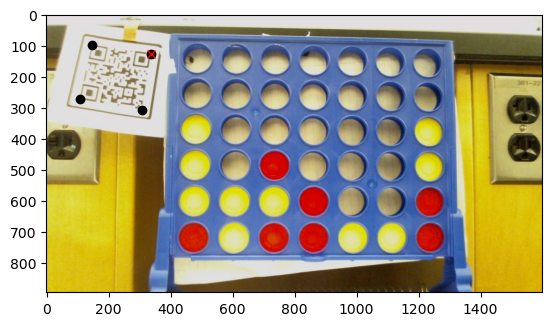

In [7]:
points=points.squeeze()
imshow(image)
plot(points[:,0],points[:,1],'ko')

mn=points.mean(axis=0)
upper_right=points[(points[:,0]>mn[0]) & (points[:,1]<mn[1]),:].ravel()
plot([upper_right[0]],[upper_right[1]],'rx')

In [8]:
import json
with open('locations.json') as json_file:
    locations = json.load(json_file)
locations

[[142, 460],
 [142, 583],
 [146, 709],
 [152, 834],
 [152, 957],
 [155, 1080],
 [162, 1196],
 [259, 460],
 [259, 586],
 [262, 712],
 [262, 831],
 [262, 954],
 [265, 1080],
 [265, 1196],
 [365, 447],
 [372, 580],
 [368, 705],
 [375, 828],
 [375, 960],
 [378, 1076],
 [372, 1199],
 [475, 447],
 [481, 576],
 [491, 709],
 [488, 831],
 [488, 957],
 [494, 1080],
 [488, 1199],
 [601, 444],
 [594, 576],
 [597, 702],
 [607, 834],
 [607, 957],
 [604, 1086],
 [607, 1209],
 [720, 447],
 [720, 573],
 [720, 712],
 [723, 838],
 [717, 954],
 [720, 1086],
 [720, 1212]]

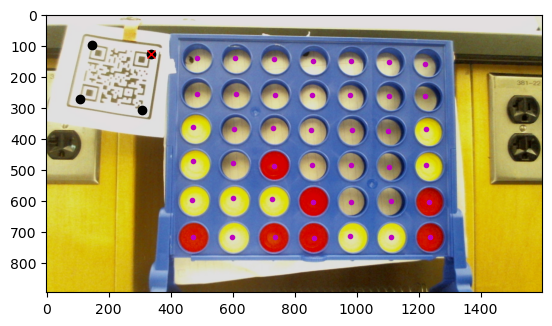

In [22]:
imshow(image)
plot(points[:,0],points[:,1],'ko')
mn=points.mean(axis=0)
upper_right=points[(points[:,0]>mn[0]) & (points[:,1]<mn[1]),:].ravel()
plot([upper_right[0]],[upper_right[1]],'rx')

for r,c in locations:

    c=c+upper_right[0]-310
    r=r+upper_right[1]-130
    
    plot([c],[r],'m.')



In [15]:
from glob import glob
filenames=glob('images/test*C4*')
filenames

['images/test1-C4pic.jpg', 'images/test3-C4pic.jpg', 'images/test2-C4pic.jpg']

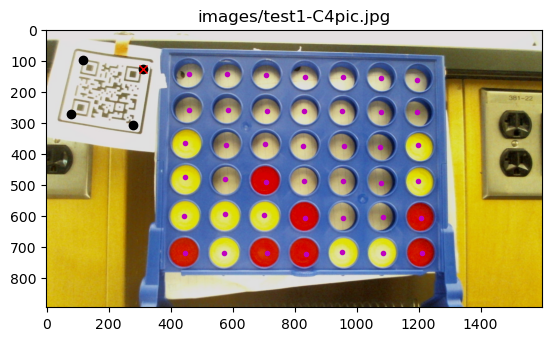

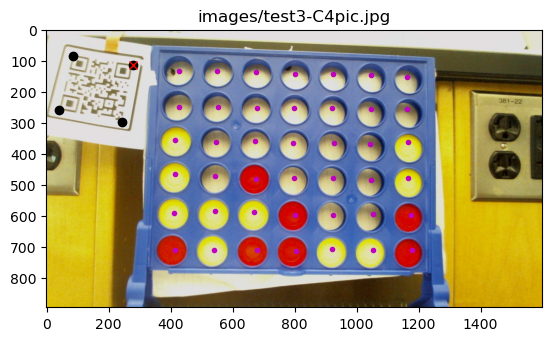

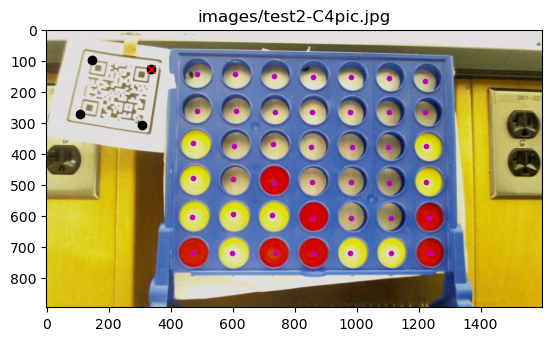

In [24]:

for fname in filenames:
    figure()
    image = cv2.imread(fname)
    image=image[:,:,[2,1,0]]  # cv2 reads BGR instead of RGB...why?
    qrCodeDetector = cv2.QRCodeDetector()
    decodedText, points, _ = qrCodeDetector.detectAndDecode(image)
    points=points.squeeze()

    imshow(image)
    plot(points[:,0],points[:,1],'ko')
    mn=points.mean(axis=0)
    upper_right=points[(points[:,0]>mn[0]) & (points[:,1]<mn[1]),:].ravel()
    plot([upper_right[0]],[upper_right[1]],'rx')
    
    for r,c in locations:
    
        c=c+upper_right[0]-310
        r=r+upper_right[1]-125
        
        plot([c],[r],'m.')
    title(fname)